#### Proyecto

Como analista de datos en una gran tienda online, en colaboracion con el departamento de marketing se necesita identificar y priorizar una serie de hipótesis orientadas a aumentar los ingresos. El objetivo principal de este proyecto es validar científicamente la efectividad de los cambios propuestos mediante la ejecución de una prueba A/B controlada. El foco esta en determinar si las modificaciones implementadas en el grupo de tratamiento (Grupo B) generaban una mejora significativa en las métricas clave de negocio, como los ingresos acumulados, el tamaño promedio de pedido y la tasa de conversión, en comparación con el grupo de control (Grupo A).



In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
# Se corrige el data set de hypothesis ya que se encontraba separado por ';'
hypotheses= pd.read_csv('hypotheses_us.csv', sep=';')
orders= pd.read_csv('orders_us.csv')
visits= pd.read_csv('visits_us.csv')

In [3]:
# vamos a verificar los sets de datos 
print(f' Total de datos duplicados: {hypotheses.duplicated().sum()}')
print(f' Total de datos nulos: \n{hypotheses.isnull().sum()}')

new_columns_names=[]

for row in hypotheses.columns:
    new_name= row.lower().strip()
    new_columns_names.append(new_name)

hypotheses.columns= new_columns_names

hypotheses.info()

 Total de datos duplicados: 0
 Total de datos nulos: 
Hypothesis    0
Reach         0
Impact        0
Confidence    0
Effort        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


In [4]:
print(f' Total de datos duplicados: {orders.duplicated().sum()}')
print(f' Total de datos nulos: \n{orders.isnull().sum()}')
orders.info()

 Total de datos duplicados: 0
 Total de datos nulos: 
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [5]:
# Ajustamos las fechas a un tipo de dato apropiado

orders['date']= pd.to_datetime(orders['date'])

orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [6]:
print(f' Total de datos duplicados: {visits.duplicated().sum()}')
print(f' Total de datos nulos: \n{visits.isnull().sum()}')
visits.info()

 Total de datos duplicados: 0
 Total de datos nulos: 
date      0
group     0
visits    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [7]:
# Ajustamos las fechas a un tipo de dato apropiado

visits['date']= pd.to_datetime(visits['date'])

visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Como pudimos observar a diferencia del set de la hipotesis el cual el data set estaba separado por ';' tambien se modificaron los nombres de columnas en minusculas para mayor comodidad en el manejo de los datos, igualmente se ajustaron los tipos de datos a uno mas apropiado como las fechas, adicional a esto los datos no presentan ninguna anomalia, podemos hacer uso de los datos para su analisis

### Parte 1. Priorizar hipótesis

In [8]:
# Aplicar el metodo para encontrar prioridad de las hypotesis metdo ICE

hypotheses['ICE'] =  (hypotheses['impact']*hypotheses['confidence'])/ hypotheses['effort']
hypotheses.sort_values(by='ICE', ascending= False)

,hypothesis,reach,impact,confidence,effort,ICE
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000
5,Add a customer review page. This will increase...,3,2,2,3,1.333333
3,Change the category structure. This will incre...,8,3,3,8,1.125000
4,Change the background color on the main page. ...,3,1,1,1,1.000000


In [9]:
# Aplicar el metodo para encontrar prioridad de las hypotesis metdo RICE 

hypotheses['RICE'] =  (hypotheses['reach']* hypotheses['impact']* hypotheses['confidence'])/ hypotheses['effort']
hypotheses.sort_values(by='RICE', ascending= False)

,hypothesis,reach,impact,confidence,effort,ICE,RICE
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


Como podemos observar los cambios en las prioridades usando los metodos ICE y RICE son bastante considerables y esto es debido a la variable del alcance, pues bien al agregar esta, podemos decir que las prioridades varian en pro de la cantidad de usuarios que puede llegar a  impactar  

### Parte 2. Análisis del test A/B

#### Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.


In [10]:

datesGroups= orders[['date','group']].drop_duplicates()

ordersAgregated= datesGroups.apply(lambda x:orders[
    np.logical_and(orders['date'] <= x['date'], orders['group']== x['group'])].agg(
        {'date':'max',
         'group':'max',
         'transactionId': pd.Series.nunique,
         'visitorId': pd.Series.nunique,
         'revenue':'sum'}),
    axis=1).sort_values(by=['date','group'])


visitorsAggregated= datesGroups.apply(lambda x:visits[
    np.logical_and(visits['date'] <= x['date'], visits['group']== x['group'])].agg(
        {'date':'max',
         'group':'max',
         'visits':'sum'}),
    axis=1).sort_values(by=['date','group'])


cumulativeData= ordersAgregated.merge(visitorsAggregated, left_on=['date','group'], right_on=['date','group'])

cumulativeData.columns=['date','group','orders','buyers','revenue','visits']

cumulativeData.head()

,date,group,orders,buyers,revenue,visits
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845


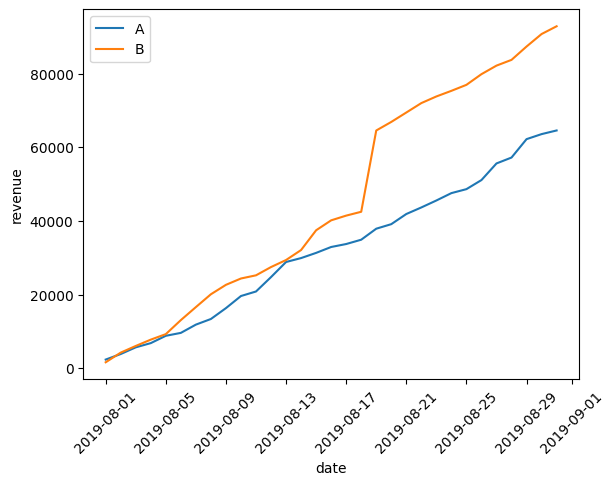

In [11]:
cumulativeRevenueA= cumulativeData[cumulativeData['group']=='A'][['date', 'revenue', 'orders']]

cumulativeRevenueB= cumulativeData[cumulativeData['group']=='B'][['date', 'revenue', 'orders']]

sns.lineplot(x=cumulativeRevenueA['date'], y=cumulativeRevenueA['revenue'], label='A')
sns.lineplot(x=cumulativeRevenueB['date'], y=cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Como se puede observar el ingreso acumulado en ambos grupos estuvo constante hasta cierto punto, sin embargo las personas del grupo B tuvieron un aumento considerable despues de del 08-17

#### Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.


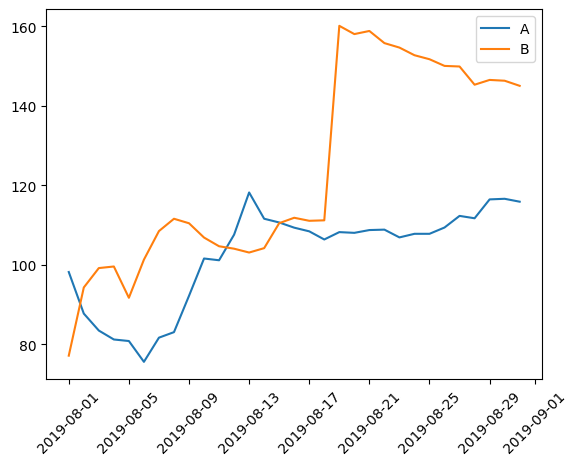

In [12]:

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.show()

El valor acumulado de la cantidad de compras promedio de los dos grupos fluctua a lo largo de la prueba, sin embargo a la mitad vemos que el promedio de compras aumento de gran medida para el grupo B y luego tuvo un ligero decremento, podriamos sospechar que tenemos valores atipicos que distorcionan los resultados. 

#### Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.


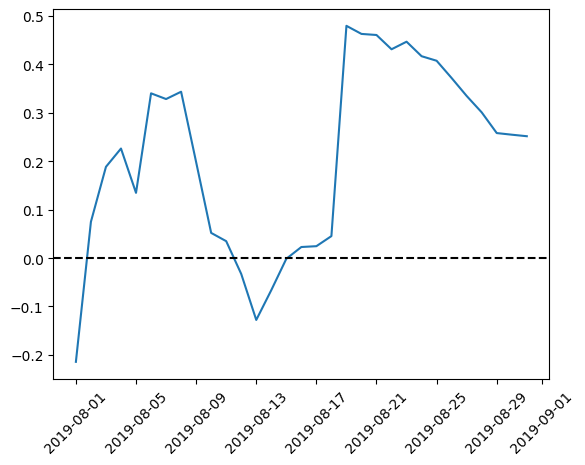

In [13]:

mergedCumulativeRevenue= cumulativeRevenueA.merge(cumulativeRevenueB,left_on='date', right_on='date', how='left', suffixes=['A','B'])

plt.plot(mergedCumulativeRevenue['date'],
        (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/ (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.show()

podemos ver que en general el tamano de compra del grupo B es mayor, y al igual que los graficos anteriores vemos que hubo un aumento considerable a mitad de la prueba. 

#### Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.


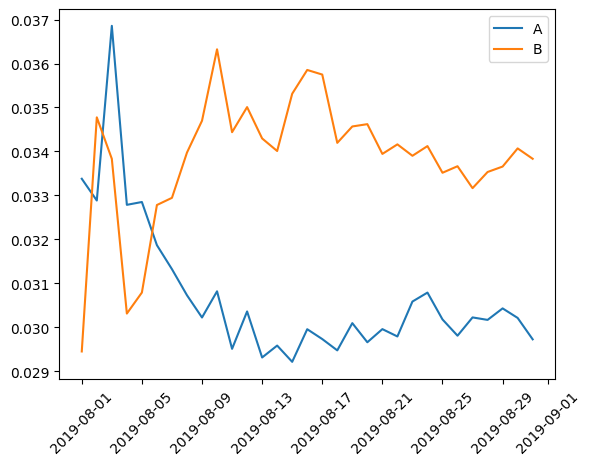

In [14]:

# calcular la conversion acumulada
cumulativeData['conversion']= cumulativeData['orders']/cumulativeData['visits']

# Seleccionar datos del grupo A
cumulativeDataA= cumulativeData[cumulativeData['group']=='A']

# Seleccionar datos del grupo A
cumulativeDataB= cumulativeData[cumulativeData['group']=='B']

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label= 'A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label= 'B')
plt.legend()
plt.xticks(rotation=45)
plt.show()


si bien el grupo A inicio con una tasa de conversion mas alta, a lo largo del experimento podemos ver que va disminuyendo mientras que el B va tomando ventaja y al final vemos que ambos grupos se estabilizan un poco.

#### Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.

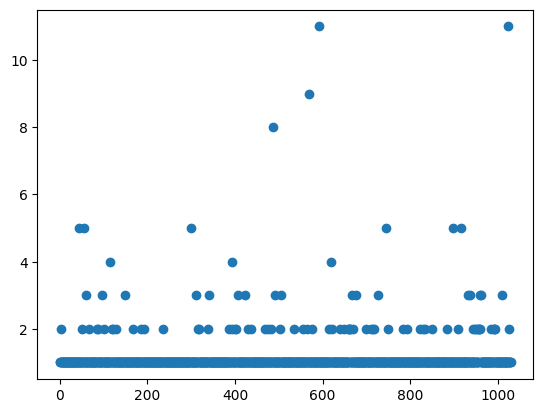

In [15]:

# primero debemos encontrar el numero de pedidos por usuario
orderByUsers= orders.groupby('visitorId', as_index=False).agg({'transactionId':pd.Series.nunique})
orderByUsers.columns=['userId','orders']

x_values= pd.Series(range(0,len(orderByUsers)))
plt.scatter(x_values, orderByUsers['orders'])
plt.show()

Como nos indica el grafico son predominantes las ordenes con un solo pedido, son muy pocos los usuarios con mas de dos pedidos, para determinar si dos pedidos tienen un porcentaje mas alto vamos a probar con los percentiles. 

## Calcula los percentiles 95 y 99 del número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [16]:
percentile = np.percentile(orderByUsers['orders'],[90,95,99])
print('Percentiles 90/95/99:', percentile)

Percentiles 90/95/99: [1. 2. 4.]


No mas del 5% de los usuarios realizaron mas de 2 pedidos, confirmamos lo que suponiamos en el grafico anterior son muy pocos los usuarios con mas de 2 productos y no mas del 1% realizaron mas de 4 pedidos 

#### Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.

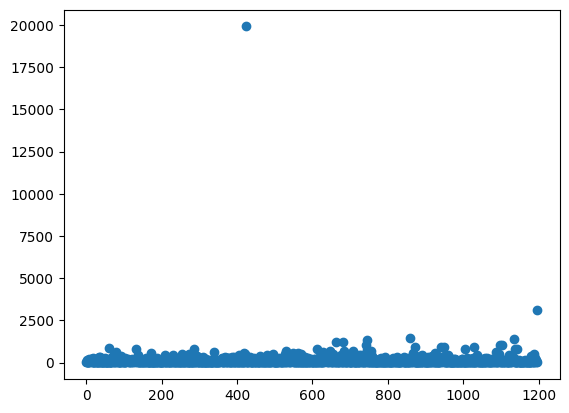

In [17]:

x_values= pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values,orders['revenue'])
plt.show()

El grafico nos muestra que la cantidad de pedidos se maneja por un rango menor a los 2500, sin embargo si se pueden observar un par de datos atipicos como lo son comrpas cercanas a los 20 mil, lo comprobaremos con los percentiles.

#### Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [18]:
percentiles= np.percentile(orders['revenue'],[90,95,99])
print('Percentiles 90/95/99:', percentiles)

Percentiles 90/95/99: [282.48  435.54  900.904]


Podemos ver que no mas del 1% de los usuarios hizo compras mayores 900 e incluso no mas del 5% hicieron compras superiores a 435, con esto podemos estimar que nuestra anomalia en los datos se encuentra con los pedidos superiores a 435 dolares. 

#### Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto.

In [19]:
orderByUsersA= orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId':pd.Series.nunique})
orderByUsersA.columns=['userId','orders']

orderByUsersB= orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId':pd.Series.nunique})
orderByUsersB.columns=['userId','orders']

sampleA= pd.concat([orderByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum()-len(orderByUsersA['orders'])),name='orders')])

sampleB= pd.concat([orderByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=="B"]['visits'].sum()-len(orderByUsersB['orders'])),name='orders')])

results= st.mannwhitneyu(sampleA, sampleB)

alpha = 0.05
print(results.pvalue)
if (results.pvalue < alpha):
    print('Hipotesis nula rechazada: No hay diferencia en las distribuciones ')
else:
    print('No se rechaza la hipotesis nula: Hay diferencia en las distribuciones')

print('{0:.3f}'. format(sampleB.mean()/sampleA.mean()-1))

0.016792355056752608
Hipotesis nula rechazada: No hay diferencia en las distribuciones 
0.138


In [37]:
sampleA

0        1
1        1
2        1
3        1
4        1
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18736, dtype: int64

Se rechaza la hipotesis nula ya que podemos ver una diferencia entre las distribuciones con una diferencia a favor del grupo B con un 13.8 % 

#### Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto.

In [20]:

results2= st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
alpha = 0.05
print(results.pvalue)
if (results2.pvalue < alpha):
    print('Hipotesis nula rechazada: No hay diferencia de tamano promedio')
else:
    print('No se rechaza la hipotesis nula: Hay diferencia de tamano promedio')

print('{0:.3f}'. format(orders[orders['group']=='B']['revenue'].mean()/ orders[orders['group']=='A']['revenue'].mean()-1))

0.016792355056752608
No se rechaza la hipotesis nula: Hay diferencia de tamano promedio
0.252


El test de Mann-Whitney U confirma que la diferencia en el revenue no es aleatoria
El valor p es ligeramente mayor que el resultado por lo tanto podemos decir que hay diferencia estadisticamente significativa entre ambos grupos.
El grupo B tiene un tamaño promedio de pedido un 25.2% mayor que el grupo A.

#### Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. 

In [21]:
#primero vamos a determinar los pedidos anomalos como aquellos que realizan mas de 2 pedidos y compras superiores a 440.

usersWithManyOrders= pd.concat([orderByUsersA[orderByUsersA['orders']>2]['userId'], orderByUsersB[orderByUsersB['orders']>2]['userId']], axis= 0)
usersWithExpensiveOrders= orders[orders['revenue']> 440]['visitorId']

# ahora unimos los usuarios que cumplen las condiciones 

abnormalUsers= pd.concat([usersWithManyOrders,usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)


1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
(73,)


In [ ]:
sampleAFiltered= pd.concat(
    [orderByUsersA[np.logical_not(orderByUsersA['userId'].isin(abnormalUsers))]['orders'],
    pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum()- len(orderByUsersA['orders'])), name='orders')],axis= 0)

sampleBFiltered= pd.concat(
    [orderByUsersB[np.logical_not(orderByUsersB['userId'].isin(abnormalUsers))]['orders'],
    pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum()- len(orderByUsersB['orders'])), name='orders')],axis= 0)

filterResults= st.mannwhitneyu(sampleAFiltered,sampleBFiltered)

alpha = 0.05
print(filterResults.pvalue)
if (results.pvalue < alpha):
    print('Hipotesis nula rechazada: No hay diferencia en las distribuciones')
else:
    print('No se rechaza la hipotesis nula: Hay diferencia en las distribuciones')

print('{0:.3f}'. format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.01428436196480213
Hipotesis nula rechazada: No hay diferencia en las distribuciones 
0.170


Al igual que los datos sin filtar observamos que no hay diferencias de distribucion en ambos grupos y el grupo B tiene una diferencia a favor del 17%

#### Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados.

In [23]:
filterResults2= st.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
        orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])#.pvalue # podemos finalizar con .pvalue para extraerlo o agregarlo al print

alpha = 0.05
print(filterResults2.pvalue)
if (results2.pvalue < alpha):
    print('Hipotesis nula rechazada: No hay diferencia en eltamano promedio ')
else:
    print('No se rechaza la hipotesis nula: Hay diferencia en el tamano promedio')


0.743836016813833
No se rechaza la hipotesis nula: Hay diferencia en el tamano promedio


In [24]:
print('{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',
    np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() /
    orders[np.logical_and(orders['group']=='A',
    np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()-1))

-0.028


Como podemos observar con el ajuste en elos datos el p valor aumento por ende la hipotesis nula no se rechaza.
El grupo B tiene un tamaño promedio de pedido un 2.8% menor que el grupo A, pero esta diferencia no es estadísticamente significativa (p = 0.744).

#### Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Parar la prueba, considerar a uno de los grupos como líder. 2. Parar la prueba, concluir que no hay diferencia entre los grupos. 3. Continuar la prueba.

Como recomendacion se propone parar la prueba ya que se concluye que no hay diferencia entre ambos grupos.
Si bien inicialmente se podia ver una diferencia y que el grupo B generaba un mayor porcentaje de ventas, al ajustar los datos sesgados que generaban ruido estadistico se concluye que no hay diferencia en ambos grupos.

Impacto de los outliers:
En los datos originales, el grupo B parecía tener un revenue mucho mayor (+25.2%), pero esto estaba inflado por usuarios anómalos.
Al filtrarlos, la diferencia se reduce a -2.8%, y el valor p indica que esta pequeña variación podría deberse al azar.

Conclusión sobre la prueba A/B:
Sin filtro: Parecía que B era mejor (pero el resultado estaba sesgado).
Con filtro: No hay diferencia real entre A y B.